<a href="https://colab.research.google.com/github/WisdomerLee/Pytorch/blob/main/9Optimization_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization &Training(Expert)
http://tensorflow.org
공식 홈페이지에서 제공하는 것을...


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

from tensorflow.keras import datasets

In [ ]:
input_shape =(28, 28, 1)
num_classes = 10

In [ ]:
tf.keras.backend.set_floatx('float64')
inputs = layers.Input(input_shape, dtype =tf.float64)
net = layers.Conv2D(32, (3,3), padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32, (3,3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size =(2,2))(net)
net = layers.Dropout(0.5)(net)

net = layers.Conv2D(64, (3,3), padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64, (3,3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size =(2,2))(net)
net = layers.Dropout(0.5)(net)

net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.5)(net)
net = layers.Dense(num_classes)(net)
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs = inputs, outputs = net, name = 'Basic_CNN')

Preprocess
tf.data사용

In [ ]:
mnist = tf.keras.datasets.mnist
#데이터 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#채널 추가
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

#데이터 일반화(크기 줄이기)
x_train, x_test = x_train/255., x_test/255.

from_tensor_slices()
shuffle()
batch()

tf.data활용

In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_ds = train_ds.shuffle(1000)
train_ds = train_ds.batch(32)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))
tset_ds = test_ds.batch(32)

데이터 시각화
matplotlib불러서 데이터 시각화하기

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

train_ds.take() #데이터 얻는 것 제한

In [ ]:
image, label = next(iter(train_ds))
image.shape, label.shape

(TensorShape([32, 28, 28, 1]), TensorShape([32]))

TypeError: Cannot convert '' to EagerTensor of dtype uint8

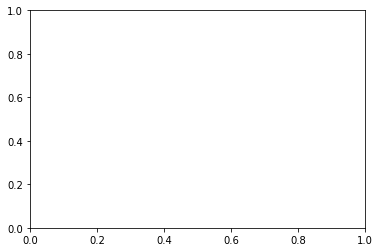

In [ ]:
for image, label in train_ds.take(2):
    plt.title(label[0])
    plt.imshow(image[0,:,:0], 'gray')
    plt.show()

Training Keras
Keras로 학습할 때는 기존과 같으나 train_ds는 generator라서 그대로 넣을 수 있음

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(train_ds, epochs=10000)

Epoch 1/10000
1875/1875 [==============================] - 311s 166ms/step - loss: 0.1450
Epoch 2/10000
1875/1875 [==============================] - 314s 167ms/step - loss: 0.0642
Epoch 3/10000
1670/1875 [=========================>....] - ETA: 32s - loss: 0.0489

Optimization
Loss Function
Optimizer

In [ ]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizer.Adam()

Loss Function을 담을 곳
Metrics


In [ ]:
train_loss = tf.keras.metrics.Mean(name ='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name = 'train_accuracy')

test_loss = tf.keras.metrics.Mean(name ='test_loss')
test_accuracy= tf.keras.

Training
@tf.function - 기존 session을 열었던 것처럼 바로 작동하지 않고 그래프만 만들어두고 학습이 시작되면 돌아감

In [ ]:
@tf.function
def train_loss(images, labels):
    with tf.GradientTape() as tape:
        predictions = model(images)
        loss = loss_object(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    
    train_loss(loss)
    train_accuracy(labels, predictions)

In [ ]:
@tf.function
def test_step(images, labels):
    predictions = model(images)
    t_loss = loss_object(labels, predictions)
    
    test_loss(t_loss)
    test_accuracy(labels, predictions)
    

In [ ]:
for epoch in range(2):
    print('Start Training')
    for images, labels in train_ds:
        train_step(images, labels)
        
    for test_images, test_labels in test_ds:
        test_step(test_images, test_labels)
    
    template = 'Epoch: {}, Loss: {}, Accuarcy: {}, Test Loss: {}, Test Accuracy: {}'
    
    print(template.format(epoch+1, train_loss.result(), train_accuracy.result()*100, test_loss.result(), test_accuracy.result()*100))
    

Evaluating
학습시킨 모델 평가

In [ ]:
model.evaluate(test_x, test_y, batch_size = batch_size)


model.evaluate